In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('banking.csv')
data.drop_duplicates()
data.shape

(41188, 21)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
pd.DataFrame(data.apply(pd.unique))

,0
age,"[44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 3..."
job,"[blue-collar, technician, management, services..."
marital,"[married, single, divorced, unknown]"
education,"[basic.4y, unknown, university.degree, high.sc..."
default,"[unknown, no, yes]"
housing,"[yes, no, unknown]"
loan,"[no, yes, unknown]"
contact,"[cellular, telephone]"
month,"[aug, nov, jun, apr, jul, may, oct, mar, sep, ..."
day_of_week,"[thu, fri, tue, mon, wed]"


In [5]:
data.loc[(data.job == 'admin.'), 'job'] = 1
data.loc[(data.job == 'blue-collar'), 'job'] = 2
data.loc[(data.job == 'entrepreneur'), 'job'] = 3
data.loc[(data.job == 'housemaid'), 'job'] = 4
data.loc[(data.job == 'management'), 'job'] = 5
data.loc[(data.job == 'retired'), 'job'] = 6
data.loc[(data.job == 'self-employed'), 'job'] = 7
data.loc[(data.job == 'services'), 'job'] = 8
data.loc[(data.job == 'student'), 'job'] = 9
data.loc[(data.job == 'technician'), 'job'] = 10
data.loc[(data.job == 'unemployed'), 'job'] = 11

data.loc[(data.marital == 'single'), 'marital'] = 0
data.loc[(data.marital == 'married'), 'marital'] = 1
data.loc[(data.marital == 'divorced'), 'marital'] = 2

data.loc[(data.education == 'illiterate'), 'education'] = 1
data.loc[(data.education == 'basic.4y'), 'education'] = 2
data.loc[(data.education == 'basic.6y'), 'education'] = 3
data.loc[(data.education == 'basic.9y'), 'education'] = 4
data.loc[(data.education == 'professional.course'), 'education'] = 5 
data.loc[(data.education == 'high.school'), 'education'] = 6
data.loc[(data.education == 'university.degree'), 'education'] = 7 

data.loc[(data.default == 'yes'), 'default'] = 1
data.loc[(data.default == 'no'), 'default'] = 0

data.loc[(data.housing == 'yes'), 'housing'] = 1
data.loc[(data.housing == 'no'), 'housing'] = 0

data.loc[(data.loan == 'yes'), 'loan'] = 1
data.loc[(data.loan == 'no'), 'loan'] = 0

data.loc[(data.contact == 'cellular'), 'contact'] = 1
data.loc[(data.contact == 'telephone'), 'contact'] = 0

data.loc[(data.month == 'jan'), 'month'] = 1
data.loc[(data.month == 'feb'), 'month'] = 2
data.loc[(data.month == 'mar'), 'month'] = 3
data.loc[(data.month == 'apr'), 'month'] = 4
data.loc[(data.month == 'may'), 'month'] = 5
data.loc[(data.month == 'jun'), 'month'] = 6
data.loc[(data.month == 'jul'), 'month'] = 7
data.loc[(data.month == 'aug'), 'month'] = 8
data.loc[(data.month == 'sep'), 'month'] = 9
data.loc[(data.month == 'oct'), 'month'] = 10
data.loc[(data.month == 'nov'), 'month'] = 11
data.loc[(data.month == 'dec'), 'month'] = 12

data.loc[(data.day_of_week == 'mon'), 'day_of_week'] = 1
data.loc[(data.day_of_week == 'tue'), 'day_of_week'] = 2
data.loc[(data.day_of_week == 'wed'), 'day_of_week'] = 3
data.loc[(data.day_of_week == 'thu'), 'day_of_week'] = 4
data.loc[(data.day_of_week == 'fri'), 'day_of_week'] = 5

data.loc[(data.poutcome == 'nonexistent'), 'poutcome'] = 0
data.loc[(data.poutcome == 'success'), 'poutcome'] = 1
data.loc[(data.poutcome == 'failure'), 'poutcome'] = 2


In [6]:
# replace missing data 

data1 = data

data1.loc[(data1.job == 'unknown'), 'job'] = -1    # missing data
data1.loc[(data1.marital == 'unknown'), 'marital'] = -1    # missing data
data1.loc[(data1.education == 'unknown'), 'education'] = -1    # missing data
data1.loc[(data1.default == 'unknown'), 'default'] = -1    # missing data      
data1.loc[(data1.housing == 'unknown'), 'housing'] = -1    # missing data
data1.loc[(data1.loan == 'unknown'), 'loan'] = -1    # missing data

pd.DataFrame(data1.apply(pd.unique))

,0
age,"[44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 3..."
job,"[2, 10, 5, 8, 6, 1, 4, 11, 3, 7, -1, 9]"
marital,"[1, 0, 2, -1]"
education,"[2, -1, 7, 6, 4, 5, 3, 1]"
default,"[-1, 0, 1]"
housing,"[1, 0, -1]"
loan,"[0, 1, -1]"
contact,"[1, 0]"
month,"[8, 11, 6, 4, 7, 5, 10, 3, 9, 12]"
day_of_week,"[4, 5, 2, 1, 3]"


In [7]:
data1.shape

(41188, 21)

In [8]:
X = data1.iloc[:, 0:-1]
y = data1['y']

X_train,X_test,y_train,y_test = train_test_split (X, y, test_size=0.3, random_state=0)

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)


C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[10708   273]
 [  834   542]]


<AxesSubplot: >

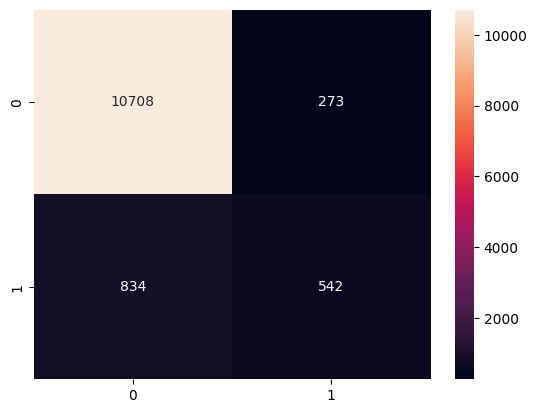

In [9]:
y_pred = log_regression.predict(X_test)

cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
print(cnf_matrix)

ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

Accuracy: 0.9104151493080845
Precision: 0.6650306748466258
Recall: 0.3938953488372093
F1: [0.95085024 0.49475126]


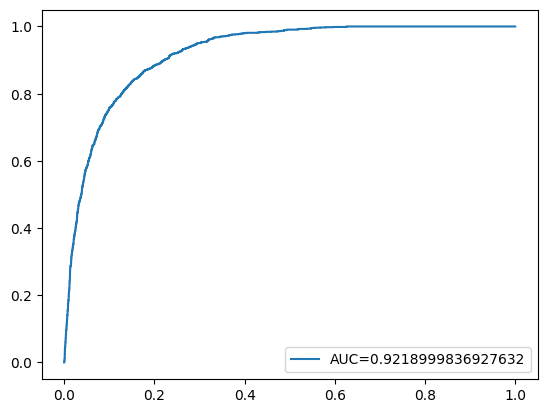

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred, average = None))

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot (fpr, tpr, label='AUC='+str(auc))
plt.legend(loc=4)
plt.show()

In [11]:
# remove missing data rows

data2 = data1

data2.loc[(data2.job == -1), 'job'] = None    # missing data
data2.loc[(data2.marital == -1), 'marital'] = None    # missing data
data2.loc[(data2.education == -1), 'education'] = None    # missing data
data2.loc[(data2.default == -1), 'default'] = None    # missing data      
data2.loc[(data2.housing == -1), 'housing'] = None    # missing data
data2.loc[(data2.loan == -1), 'loan'] = None    # missing data

data2 = data.dropna(axis='rows', how='any')  #, inplace=True)

data2.shape

(30488, 21)

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

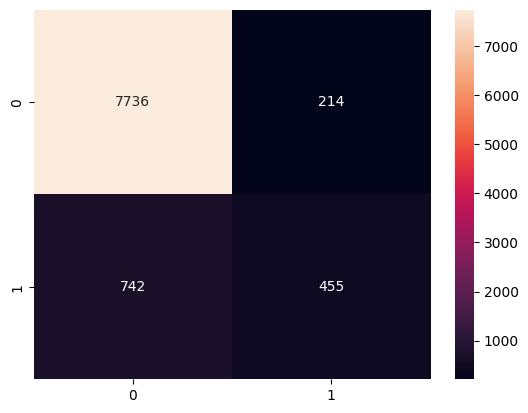

In [12]:
X = data2.iloc[:, 0:-1]
y = data2['y']

X_train,X_test,y_train,y_test = train_test_split (X, y, test_size=0.3, random_state=0)

log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

y_pred = log_regression.predict(X_test)

cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [13]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred, average = None))

Accuracy: 0.8954848584235269
Precision: 0.680119581464873
Recall: 0.38011695906432746
F1: [0.94180667 0.48767417]


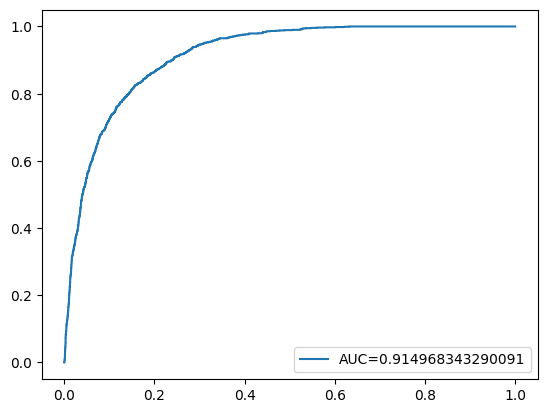

In [14]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
# remove missing data columns

pd.DataFrame(data.apply(pd.unique))
data3 = data.dropna(axis='columns', how='any')  #, inplace=True)
data3.shape

(41188, 15)

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

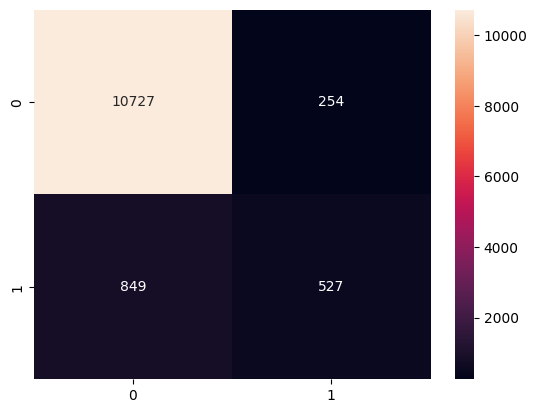

In [16]:
X = data3.iloc[:, 0:-1]
y = data3['y']

X_train,X_test,y_train,y_test = train_test_split (X, y, test_size=0.3, random_state=0)

log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

y_pred = log_regression.predict(X_test)

cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

Accuracy: 0.9107388524722829
Precision: 0.674775928297055
Recall: 0.38299418604651164
F1: [0.95110165 0.48864163]


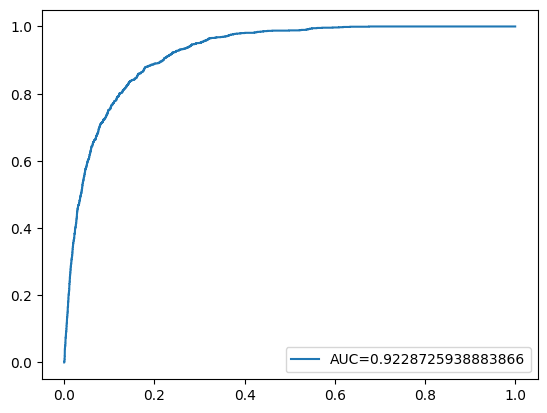

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred, average = None))

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot (fpr, tpr, label='AUC='+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
# 
# видалення 25% rows (об'єктів) з missing data дає гірші показники accuracy, 
# ніж видалення 30% columns (ознак) або заміна unknown індексом
# 
# видалення columns з unknown у порівнянні із заміною unknown на індекс дає більше істинно позитивних результатів, 
# збільшуючи False Negative і зменшуючи False Positive
# 
# в цілому показники визначення позитивних об'єктів не високі: 
# частка всіх об'єктів, визначених моделлю як позитивні і які при цьому дійсно позитивні (precision) 0.66-0.68 
# частка об'єктів позитивного класу, визначених моделлю як позитивні (recall) всього 0.38-0.39
# тобто багато хибно негативних визначень
